## Test 1 : XGboost

In [34]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import lightgbm
import catboost

In [35]:
from sklearn import datasets
digits = datasets.load_digits()

In [36]:
images = digits.images
targets = digits.target
print(images.shape)

(1797, 8, 8)


In [37]:
images = images.reshape(1797, 8*8)

In [38]:
x_train, x_valid, y_train, y_valid = train_test_split(images, targets, test_size=0.2)
print(x_train.shape, y_train.shape)

(1437, 64) (1437,)


In [39]:
model = xgb.XGBClassifier(learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma= 0,
    colsample_bylevel= 0.8,
    nthread= 4,
    seed= 27)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = model.predict(x_valid)

confusion matrix
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 1  2 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  1  0  0  1]
 [ 0  0  0  0  0 36  1  0  0  1]
 [ 0  0  0  0  1  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 33  1  1]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  1  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.95      1.00      0.98        41
           2       1.00      0.92      0.96        36
           3       0.97      1.00      0.99        33
           4       0.97      0.95      0.96        37
           5       1.00      0.95      0.97        38
           6       0.95      0.97      0.96        38
           7       1.00      0.94      0.97        35
           8       0.97      1.00      0.98        32
           9       0.92      0.97      0.94        34

    accuracy                           0.97       360
  

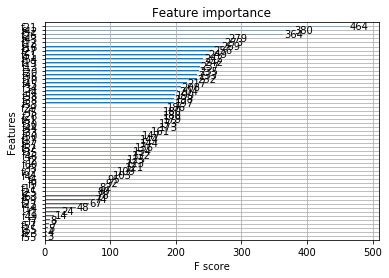

In [41]:
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion = confusion_matrix(y_valid, y_pred)
print('confusion matrix')
print(confusion)
plot_importance(model)
print(classification_report(y_valid, y_pred))

In [42]:
from sklearn.model_selection import GridSearchCV

param_test = {
    'max_depth': [4, 5, 6],
    'min_child_weight': [4, 5, 6]
}
xgbGS = xgb.XGBClassifier(learning_rate=0.1,
                    n_estimators=100,
                    max_depth=5,
                    min_child_weight=2,
                    gamma= 0,
                    colsample_bylevel= 0.8,
                    nthread= 4,
                    seed= 27)
gsearch = GridSearchCV(estimator=xgbGS, param_grid=param_test, cv=5)
gsearch_model = gsearch.fit(x_train, y_train)

In [43]:
gsearch_preds = gsearch_model.predict(x_valid)
print(classification_report(y_valid, y_pred))
print(accuracy_score(y_valid, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.95      1.00      0.98        41
           2       1.00      0.92      0.96        36
           3       0.97      1.00      0.99        33
           4       0.97      0.95      0.96        37
           5       1.00      0.95      0.97        38
           6       0.95      0.97      0.96        38
           7       1.00      0.94      0.97        35
           8       0.97      1.00      0.98        32
           9       0.92      0.97      0.94        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

96.94444444444444


## Test 2 LightGBM

In [66]:
from lightgbm import LGBMClassifier

lightgbm_model = LGBMClassifier()
lightgbm_model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
y_pred = lightgbm_model.predict(x_valid)

In [72]:
print(accuracy_score(y_valid, y_pred) * 100)
lightgbm_model.booster_.save_model('./lightgbm_model.txt')
bst = lightgbm.Booster(model_file="./lightgbm_model.txt")
y_pred = bst.predict(x_valid)
print(y_pred.shape)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(lightgbm_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print(np.mean(n_scores), np.std(n_scores))

0.969646455425089 0.01092106482388415


In [48]:
lightgbm_model.feature_importances_

array([  0,  45, 425, 533, 536, 581, 181,  11,   0, 250, 458, 316, 580,
       674, 163,  17,   0, 381, 644, 781, 603, 915, 245,   2,   0, 307,
       921, 551, 536, 545, 316,   0,   0, 465, 517, 349, 572, 453, 436,
         0,   0, 215, 814, 674, 435, 469, 335,   0,   0,  54, 367, 628,
       485, 411, 429,  36,   0,   7, 532, 305, 435, 462, 323,  97],
      dtype=int32)

In [49]:
param_test = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gsearch_lightgbm_model = GridSearchCV(estimator=lightgbm_model, param_grid=param_test, cv=5)
gsearch_lightgbm_model.fit(x_train, y_train)
print('best params: ', gsearch_lightgbm_model.best_params_)

best params:  {'learning_rate': 0.1, 'n_estimators': 40}


In [50]:
y_pred = gsearch_lightgbm_model.predict(x_valid)
print(accuracy_score(y_valid, y_pred) * 100)

96.94444444444444


In [51]:
gsearch_lightgbm_model.best_estimator_.booster_.save_model('./gsearch_lightgbm_model.txt')

In [59]:
bst = lightgbm.Booster(model_file="./gsearch_lightgbm_model.txt")

(360, 64)
(360, 10)
